# Getting familiar with torch.autograd

Neural networks (NNs) are a collection of nested functions that are executed on some input data. These functions are defined by parameters (consisting of weights and biases), which in PyTorch are stored in tensors.

Training a NN happens in two steps:

- Forward Propagation: In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.

- Backward Propagation: In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent. 

In [1]:
import torch

### Vector to scalar

In [2]:
# define the x vector
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [3]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
print(x.grad)  # The gradient is None by default

None


In [4]:
# define the y = f(x) function returning a scalar
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad == 4 * x

tensor([True, True, True, True])

### Vector to vector

Because y is a vector, we must pass a gradient argument to backward(). 

We pass $v^ᵀ$ with the same length as y and has values 1.

In [7]:
x = torch.tensor([1., 2.], requires_grad=True)
print('x:', x)

y = 3 * x**2
print('y:', y)

gradient_value = [1., 1.] # here is to show how to use the gradient argument in the backward function
# it is not necessary to use this argument, but it can be useful in some cases, to scale the gradients (see example below)

y.backward(torch.tensor(gradient_value)) 
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad: tensor([ 6., 12.])


In [8]:
x = torch.tensor([1., 2.], requires_grad=True)
print('x:', x)

y = 3 * x**2
print('y:', y)

gradient_value = [1., 10.] # here is to show how to use the gradient argument
y.backward(torch.tensor(gradient_value)) 
print('x.grad:', x.grad)


x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad: tensor([  6., 120.])


One benefit of using automatic differentiation is that even if building the computational graph of a function required passing through a maze of Python control flow (e.g., conditionals, loops, and arbitrary function calls), we can still calculate the gradient of the resulting variable.

In [9]:
def f(a): 
    b = a * 2
    while b.norm() < 1000: 
        b = b * 2
    if b.sum() > 0: 
        c = b
    else:
        c = 100 * b
    return c

In [10]:
a = torch.randn(size=(), requires_grad=True)
print('a:', a)
d = f(a)
d.backward()
print('a.grad:', a.grad)
# check that gradient is f(a)/a as expected dince the function is f(a) = constant * a
a.grad == f(a)/a

a: tensor(0.6281, requires_grad=True)
a.grad: tensor(2048.)


tensor(True)

## Exercises

### Ex 1 -- Practice with this topic, you can follow the step-by-step tutorial here
 
[*The Gradient Argument in PyTorch’s `backward()` Function Explained by Examples*](https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29).

### Jacobian Matrix

If you have a vector valued function

$$
\vec{y} = f
\left(
\vec{x}
\right)
$$

Then the gradient of $\vec{y}$ is a Jacobian matrix

$$
\nabla \vec{y} = J =
\begin{bmatrix}
\frac{\partial y_{1}}{\partial x_{1}} & \dots & \frac{\partial y_{1}}{\partial x_{n}} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_{m}}{\partial x_{1}} & \dots & \frac{\partial y_{m}}{\partial x_{n}} \\
\end{bmatrix}
$$

#### Vector-Jacobian Product

If you have a scalar function

$$
\ell = g
\left(
\vec{y}
\right)
$$

and any vector $\vec{v}$

$$
\vec{v} = 
\left(
v_{1} , v_{2} , \dots , v_{m}
\right) ^{T}
$$

and $\vec{v}$ is the gradient of the scalar function $\ell$

$$
\vec{v} = \nabla \ell = 
\left(
\frac{\partial \ell}{\partial y_{1}} , \dots , \frac{\partial \ell}{\partial y_{m}}
\right)^{T}
$$

then the vector-Jacobian product would be the gradient of $\ell$ with respect to $\vec{x}$

$$
J^{T} \cdot \vec{v} =
\begin{bmatrix}
\frac{\partial y_{1}}{\partial x_{1}} & \dots & \frac{\partial y_{m}}{\partial x_{1}} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_{1}}{\partial x_{n}} & \dots & \frac{\partial y_{m}}{\partial x_{n}} \\
\end{bmatrix}
\begin{bmatrix}
\frac{\partial \ell}{\partial y_{1}} \\
\vdots \\
\frac{\partial \ell}{\partial y_{m}} \\
\end{bmatrix}
=
\begin{bmatrix}
\frac{\partial \ell}{\partial x_{1}} \\
\vdots \\
\frac{\partial \ell}{\partial x_{n}} \\
\end{bmatrix}
$$

In [11]:
import torch
import numpy as np
from torch import tensor
from numpy import array

##### Input = Scalar, Output = Scalar

$$
J = \left( \frac{\partial y_{1}}{\partial x_{1}} \right) = \left( \frac{\partial y}{\partial x} \right) = 2x
$$

In [12]:
# Using PyTorch
x = tensor(1., requires_grad=True)
print('x: ', x)
y = x ** 2
print('y: ', y)
y.backward()
print('x.grad: ', x.grad)

x:  tensor(1., requires_grad=True)
y:  tensor(1., grad_fn=<PowBackward0>)
x.grad:  tensor(2.)


In [13]:
# Using NumPy
x = x.detach().numpy()
J = array([[2*x]])
print('J: ', J)

v_T = array([[1.]])
print('v_T: ', v_T)
print('v_T dot J: ', v_T@J)

J:  [[2.]]
v_T:  [[1.]]
v_T dot J:  [[2.]]


In [14]:
# Non-default gradient using PyTorch
x = tensor(1., requires_grad=True)
print('x: ', x) 
y = x ** 2
print('y: ', y)
gradient_value = 100.
y.backward(tensor(gradient_value))
print('x.grad: ', x.grad)

x:  tensor(1., requires_grad=True)
y:  tensor(1., grad_fn=<PowBackward0>)
x.grad:  tensor(200.)


In [15]:
# Non-default gradient using NumPy
x = x.detach().numpy()
J = array([[2*x]])
print('J: ', J)
v_T = array([[gradient_value]])
print('v_T: ', v_T)
print('v_T dot J: ', v_T@J)

J:  [[2.]]
v_T:  [[100.]]
v_T dot J:  [[200.]]


In [16]:
# Gradient is vector using PyTorch
x = tensor(1., requires_grad=True)
print('x: ', x)
y = torch.stack([x ** 2, x ** 2, x ** 2, x ** 2])
print('y: ', y)
gradient_value = tensor([1., 10., 100., 1000.])
y.backward(gradient_value)
print('x.grad: ', x.grad)

x:  tensor(1., requires_grad=True)
y:  tensor([1., 1., 1., 1.], grad_fn=<StackBackward0>)
x.grad:  tensor(2222.)


In [17]:
# Backwards accumulation
x = tensor(1., requires_grad=True)
y = x ** 2
gradient_value = [1., 10., 100., 1000.]

for v in gradient_value:
    y.backward(tensor(v), retain_graph=True)
    print('x.grad: ', x.grad)

x.grad:  tensor(2.)
x.grad:  tensor(22.)
x.grad:  tensor(222.)
x.grad:  tensor(2222.)


In [18]:
# Gradient is vector using NumPy
x = x.detach().numpy()
J = array([[2*x]])
print('J: ', J)
J_broadcast = np.repeat(J, len(gradient_value), axis=0)
print('J_broadcast: ')
print(J_broadcast)

v_T = array(gradient_value)
print('v_T: ', v_T)
print('v_T dot J_broadcast: ', v_T@J_broadcast)

J:  [[2.]]
J_broadcast: 
[[2.]
 [2.]
 [2.]
 [2.]]
v_T:  [   1.   10.  100. 1000.]
v_T dot J_broadcast:  [2222.]


##### Input = Vector, Output = Scalar

$$
J =  
\left(
\frac{\partial y_{1}}{\partial x_{1}} , \frac{\partial y_{1}}{\partial x_{2}}
\right)
=
\left(
1 , 1
\right)
$$

In [19]:
# Using PyTorch
x = tensor([1., 2.], requires_grad=True)
print('x: ', x)
y = sum(x)
print('y: ', y)
y.backward()
print('x.grad: ', x.grad)

x:  tensor([1., 2.], requires_grad=True)
y:  tensor(3., grad_fn=<AddBackward0>)
x.grad:  tensor([1., 1.])


In [20]:
# Using NumPy
J = array([[1, 1]])
print('J:')
print(J)

v_T = array([[1]])
print('v_T: ', v_T)
print('v_T dot J: ', v_T@J)

J:
[[1 1]]
v_T:  [[1]]
v_T dot J:  [[1 1]]


In [21]:
# Non-default gradient using PyTorch
x = tensor([1., 2.], requires_grad=True)
print('x: ', x)
y = sum(x)
gradient_value = 100.
y.backward(tensor(gradient_value))
print('x.grad: ', x.grad)

x:  tensor([1., 2.], requires_grad=True)
x.grad:  tensor([100., 100.])


In [22]:
# Non-default gradient using NumPy
J = array([[1, 1]])
print('J:')
print(J)

v_T = array([[gradient_value]])
print('v_T: ', v_T)
print('v_T dot J: ', v_T@J)

J:
[[1 1]]
v_T:  [[100.]]
v_T dot J:  [[100. 100.]]


In [23]:
# Gradient is vector using PyTorch
x = tensor([1., 2.], requires_grad=True)
print('x: ', x)
y = torch.stack([x.sum(), x.sum(), x.sum(), x.sum()])
print('y: ', y)
gradient_value = [1., 10., 100., 1000.]
y.backward(tensor(gradient_value))
print('x.grad: ', x.grad)

x:  tensor([1., 2.], requires_grad=True)
y:  tensor([3., 3., 3., 3.], grad_fn=<StackBackward0>)
x.grad:  tensor([1111., 1111.])


In [24]:
# Backwards accumulation
x = tensor([1., 2.], requires_grad=True)
y = sum(x)
gradient_value = [1., 10., 100., 1000.]
for v in gradient_value:
    y.backward(tensor(v), retain_graph=True)
    print('x.grad: ', x.grad)

x.grad:  tensor([1., 1.])
x.grad:  tensor([11., 11.])
x.grad:  tensor([111., 111.])
x.grad:  tensor([1111., 1111.])


In [25]:
# Gradient is vector using NumPy
x = x.detach().numpy()
J = array([[1, 1]])
print('J: ', J)
J_broadcast = np.repeat(J, len(gradient_value), axis=0)
print('J_broadcast: ')
print(J_broadcast)

v_T = array(gradient_value)
print('v_T: ', v_T)
print('v_T dot J_broadcast: ', v_T@J_broadcast)

J:  [[1 1]]
J_broadcast: 
[[1 1]
 [1 1]
 [1 1]
 [1 1]]
v_T:  [   1.   10.  100. 1000.]
v_T dot J_broadcast:  [1111. 1111.]


##### Input = Vector, Output = Vector

$$
J =
\begin{bmatrix}
\frac{\partial y_{1}}{\partial x_{1}} & \frac{\partial y_{1}}{\partial x_{2}} \\
\frac{\partial y_{2}}{\partial x_{1}} & \frac{\partial y_{2}}{\partial x_{2}} \\
\end{bmatrix}
=
\begin{bmatrix}
6x_{1} & 0 \\
0 & 6x_{2} \\
\end{bmatrix}
$$

In [26]:
# Using PyTorch
x = tensor([1., 2.], requires_grad=True)
print('x: ', x)
y = 3 * x ** 2
print('y: ', y)
gradient_value = [1., 1.]
y.backward(tensor(gradient_value))
print('x.grad: ', x.grad)

x:  tensor([1., 2.], requires_grad=True)
y:  tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad:  tensor([ 6., 12.])


In [27]:
# Using NumPy
x = x.detach().numpy()
J = array([[6*x[0], 0], [0, 6*x[1]]])
print('J:')
print(J)

v_T = array([gradient_value])
print('v_T: ', v_T)
print('v_T dot J: ', v_T@J)

J:
[[ 6.  0.]
 [ 0. 12.]]
v_T:  [[1. 1.]]
v_T dot J:  [[ 6. 12.]]


In [28]:
# Non-one gradient using PyTorch
x = tensor([1., 2.], requires_grad=True)
print('x: ', x)
y = 3 * x ** 2
print('y: ', y)
gradient_value = [1., 10.]
y.backward(tensor(gradient_value))
print('x.grad: ', x.grad)

x:  tensor([1., 2.], requires_grad=True)
y:  tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad:  tensor([  6., 120.])


In [29]:
# Non-one gradient using NumPy
x = x.detach().numpy()
J = array([[6*x[0], 0], [0, 6*x[1]]])
print('J:')
print(J)

v_T = array([gradient_value])
print('v_T: ', v_T)
print('v_T dot J: ', v_T@J)

J:
[[ 6.  0.]
 [ 0. 12.]]
v_T:  [[ 1. 10.]]
v_T dot J:  [[  6. 120.]]


##### Input = Vector, Output = Vector Full Example

$$
x =
\left(
x_{1} , x_{2} 
\right)
=
\left(
1 , 2 
\right)
$$

$$
y =
\left(
3x_{1}^{2} , x_{1}^{2} + 2x_{2}^{3} , 10x_{2} \\
\right)
$$

$$
y = 
\left(
y_{1} = 3x_{1}^{2} , y_{2} = x_{1}^{2} + 2x_{2}^{3} , y_{3} = 10x_{2}
\right)
$$

$$
J =
\begin{bmatrix}
\frac{\partial y_{1}}{\partial x_{1}} & \frac{\partial y_{1}}{\partial x_{2}} \\
\frac{\partial y_{2}}{\partial x_{1}} & \frac{\partial y_{2}}{\partial x_{2}} \\
\frac{\partial y_{3}}{\partial x_{1}} & \frac{\partial y_{3}}{\partial x_{2}} \\
\end{bmatrix}
=
\begin{bmatrix}
6x_{1} & 0 \\
2x_{1} & 6x_{2}^{2} \\
0 & 10 \\
\end{bmatrix}
$$

In [30]:
# Using PyTorch
x = tensor([1., 2.], requires_grad=True)
print('x: ', x)
y = torch.empty(3)
y[0] = 3 * x[0] ** 2
y[1] = x[0] ** 2 + 2 * x[1] ** 3
y[2] = 10 * x[1]
print('y: ', y)
gradient_value = [1., 10., 100.]
y.backward(tensor(gradient_value))
print('x.grad: ', x.grad)

x:  tensor([1., 2.], requires_grad=True)
y:  tensor([ 3., 17., 20.], grad_fn=<CopySlices>)
x.grad:  tensor([  26., 1240.])


In [31]:
# Using NumPy
x = x.detach().numpy()
J = array([[6*x[0], 0], 
           [2*x[0], 6*x[1]**2], 
           [0, 10]])
print('J:')
print(J)

v_T = array([gradient_value])
print('v_T: ', v_T)
print('v_T dot J: ', v_T@J)

J:
[[ 6.  0.]
 [ 2. 24.]
 [ 0. 10.]]
v_T:  [[  1.  10. 100.]]
v_T dot J:  [[  26. 1240.]]


### Ex 2 -- Let 𝑓 (𝑥) = sin(𝑥). Plot the graph of 𝑓 and of its derivative 𝑓 ′. Do not exploit the fact that 𝑓 ′ (𝑥) = cos(𝑥) but rather use automatic differentiation to get the result.

In [39]:
import torch
import numpy as np
import matplotlib.pyplot as plt

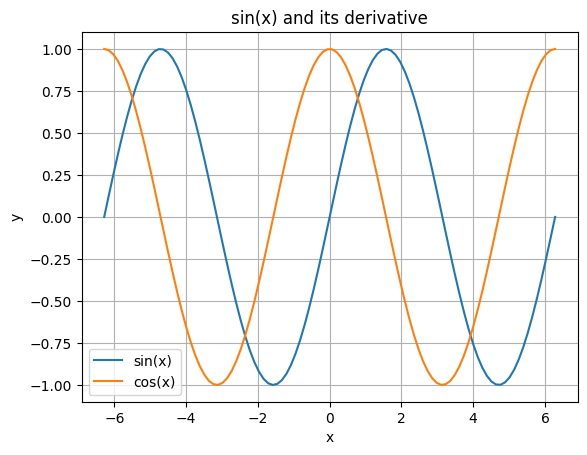

In [38]:
x = torch.linspace(-2 * torch.pi, 2 * torch.pi, steps = 100, requires_grad=True)
y = torch.sin(x)
y_prime = torch.autograd.grad(y, x, grad_outputs = torch.ones_like(y))[0]

x_np = x.detach().numpy()
y_np = y.detach().numpy()
y_prime_np = y_prime.detach().numpy()

plt.figure()
plt.plot(x_np, y_np, label='sin(x)')
plt.plot(x_np, y_prime_np, label='cos(x)')
plt.title('sin(x) and its derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Ex 5 -- Let 𝑓 (𝑥) = ((log $x^2$) · sin 𝑥) + $𝑥^{−1}$. 

Write out a dependency graph tracing results from 𝑥 to 𝑓 (𝑥):
We'll identify intermediate steps starting from x and building up to f(x)

- Start from: x

- Intermediate computations:
    - $x^2$ 
        - log($x^2$)
    - sin(x) 
        - log($x^2$) * sin(x)
    - 1/x
        - log($x^2$) * sin(x) + 1/x

Now use the chain rule to comput the analytical derivative of the function; also compute the gradient using autograd and compare the two solutions by plotting them and see if they overlap.

In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [59]:
x = torch.linspace(-2 * torch.pi, 2 * torch.pi, steps = 500)
eps = 1e-6
mask = x.abs() > eps
x_masked = x[mask].clone().detach().requires_grad_(True)
y = torch.log(x_masked ** 2) * torch.sin(x_masked) + 1.0 / x_masked

y_prime_analytic = torch.log(x_masked ** 2) * torch.cos(x_masked) + (2.0 * torch.sin(x_masked)) / x_masked - 1.0 / (x_masked ** 2)
y_grad = torch.autograd.grad(y, x_masked, grad_outputs = torch.ones_like(y))[0]

x_np = x_masked.detach().numpy()
y_np = y.detach().numpy()
y_prime__analytic_np = y_prime_analytic.detach().numpy()
y_grad_np = y_grad.detach().numpy()

diff = np.abs(y_prime__analytic_np - y_grad_np)

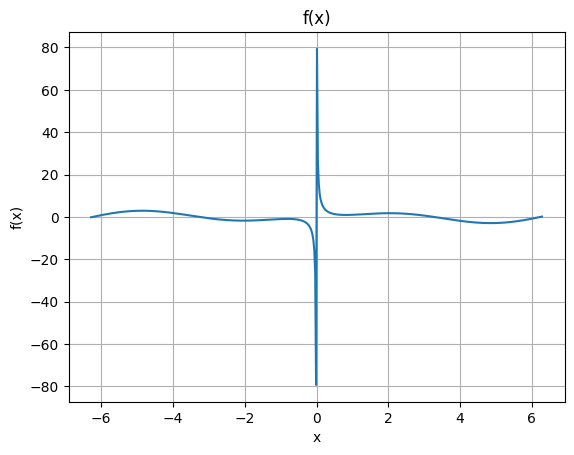

In [60]:
plt.figure()
plt.plot(x_np, y_np, label='f(x)')
plt.title('f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

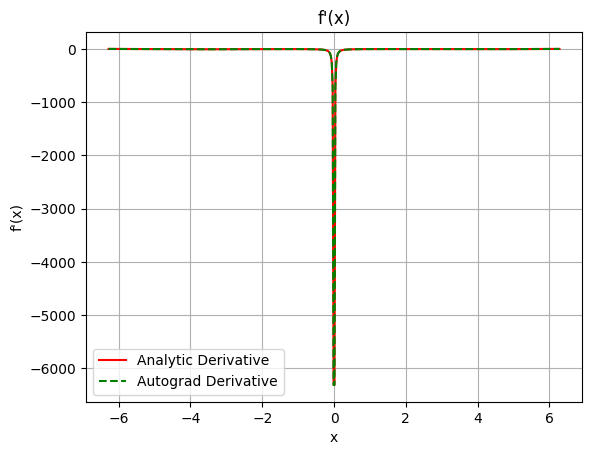

In [61]:
plt.figure
plt.plot(x_np, y_prime__analytic_np, color = 'red', label='Analytic Derivative')
plt.plot(x_np, y_grad_np, color = 'green', linestyle = '--', label='Autograd Derivative')
plt.title('f\'(x)')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()
plt.grid(True)
plt.show()

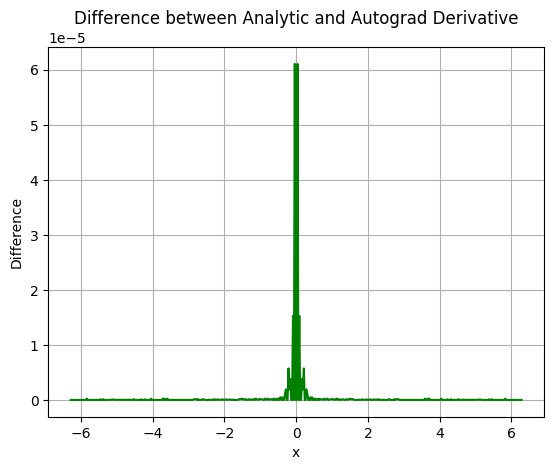

In [62]:
plt.figure()
plt.plot(x_np, diff, color = 'green', label='Difference')
plt.title('Difference between Analytic and Autograd Derivative')
plt.xlabel('x')
plt.ylabel('Difference')
plt.grid(True)
plt.show()